<a href="https://colab.research.google.com/github/OMEAkin/ML_with_TF_Opencampus_SH/blob/main/1A_Housing_Prices_OMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

---

## Step 2: Create a Synthetic Dataset
Create a dataset for housing prices that follows the equation:

$\text{price}$ = $\text{no of bedrooms}$ $\times  x$ + $\text{base price}$


In [11]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,5,3.5
1,4,3.0
2,1,1.5
3,4,3.0
4,5,3.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


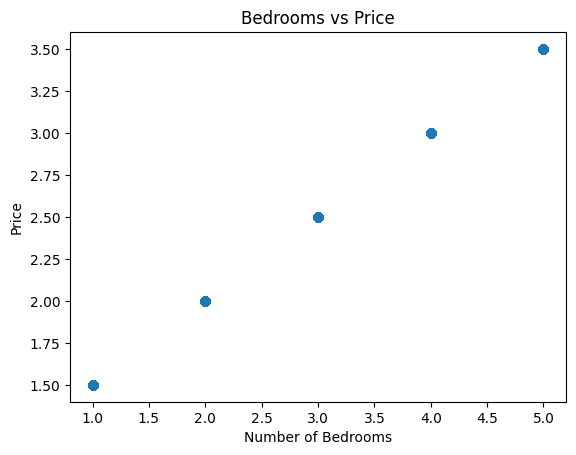

In [12]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()

---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [13]:
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,
                                                    train_size = 0.75)


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [14]:
# Create the model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# print a Summary of the model
print(model.summary()) #why print a summary before training????

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

None


---

## Step 6: Train the Model
Train the model using the training data.


In [15]:
# Train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.2500   
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.7502 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8859 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.8255  
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2308 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.6814 
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.4969 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.5775  
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.3592 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.8633 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.7449  
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2265 
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3803  
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.6122 
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


In [16]:
# Evaluate the model using the model.evaluate() function
model.evaluate(X_test, y_test, verbose=2)

8/8 - 0s - 14ms/step - loss: 0.0045


0.0045213946141302586

In [17]:
# Make predictions
predictions = model.predict(X_test)
print(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[2.4651103]
 [1.5502536]
 [2.4651103]
 [3.3799667]
 [1.5502536]
 [2.4651103]
 [2.9225383]
 [2.0076818]
 [2.4651103]
 [2.4651103]
 [2.4651103]
 [2.0076818]
 [2.4651103]
 [3.3799667]
 [2.4651103]
 [2.0076818]
 [2.4651103]
 [3.3799667]
 [2.0076818]
 [3.3799667]
 [2.9225383]
 [1.5502536]
 [3.3799667]
 [3.3799667]
 [2.9225383]
 [1.5502536]
 [2.0076818]
 [2.4651103]
 [2.9225383]
 [2.9225383]
 [3.3799667]
 [2.4651103]
 [2.0076818]
 [3.3799667]
 [2.0076818]
 [2.9225383]
 [2.9225383]
 [2.4651103]
 [3.3799667]
 [3.3799667]
 [1.5502536]
 [2.4651103]
 [1.5502536]
 [2.4651103]
 [1.5502536]
 [1.5502536]
 [3.3799667]
 [2.4651103]
 [1.5502536]
 [2.4651103]
 [2.0076818]
 [2.4651103]
 [2.9225383]
 [2.4651103]
 [1.5502536]
 [3.3799667]
 [2.4651103]
 [2.4651103]
 [3.3799667]
 [2.0076818]
 [2.9225383]
 [2.9225383]
 [1.5502536]
 [1.5502536]
 [2.4651103]
 [1.5502536]
 [2.9225383]
 [1.5502536]
 [3.3799667]
 [2.0076818]
 [2.0076818]
 [1.5502536]
 [2.9225383]
 [2.9225383]


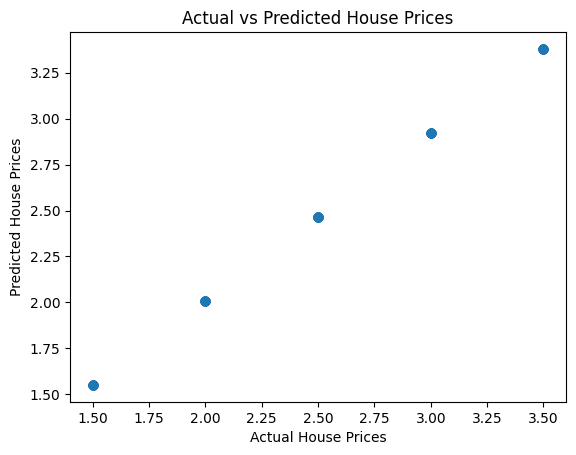

In [18]:
# include the plots for mse and actual vs predicted...

# Plot real vs predicted prices (hint: you can use the plotting code from above as a start)
plt.scatter(y_test, predictions)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.


---


Comment: The loss functions are really large. This is because the loss function calculates the difference between predicted values and labels. With the MSE, the difference are squared, also leading to disproportionately large loss values.

Since the initial weights in neural networks are usually small random values (in order to avoid issues like exploding or vanishing gradients)

In [19]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 50000  # The price added per bedroom in onehundred thousands
base_price = 100000  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,2,200000
1,5,350000
2,5,350000
3,5,350000
4,5,350000


In [24]:
## DATA PREPROCESSING
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,
                                                    train_size = 0.75)
## MODEL BUILDING & COMPILATION
model = tf.keras.Sequential()
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer = 'adam', loss = 'mse')

## MODEL FITTING
model.fit(X_train, y_train, epochs = 10)

## MODEL EVALUATION
model.evaluate(X_test, y_test, verbose = 2)

## PREDICTION
pred = model.predict(X_test)
print(pred)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73186172928.0000
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70145630208.0000 
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73606594560.0000 
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69504901120.0000 
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70522404864.0000  
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70841442304.0000  
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70501539840.0000  
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70053724160.0000  
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70283083776.0000 
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70925041664.0000 
8/8 - 0s - 12ms/step - loss: 66707738624.0000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[4.0693483]
 [6.6225386]
 [2.792753 ]
 [5.3459435]
 [5.3459435]
 [6.6225386]
 [5.3459435]
 [4.0693483]
 [6.6225386]
 [4.0693483]
 [6.6225386]
 [2.792753 ]
 [4.069

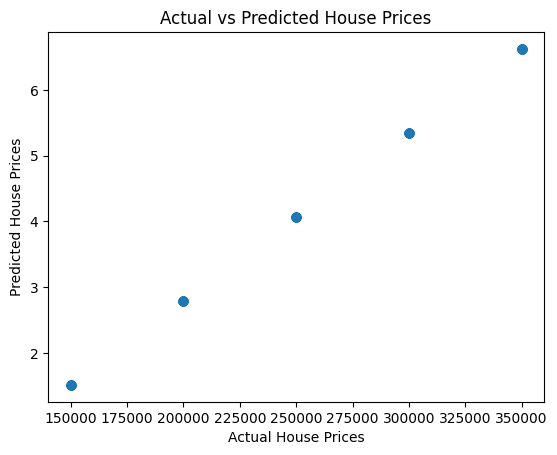

In [25]:
# Plot real vs predicted prices (hint: you can use the plotting code from above as a start)
plt.scatter(y_test, pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()